In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
pip install yfinance

In [6]:
#Importing the yfinance library which is used to fetch financial data from yahoo finance
import yfinance as yf

#Defining starting and ending dates for the data we want to fetch
start = '2009-12-31'
end = '2019-12-31'

# Fetch the historical stock data for Apple (AAPL) from Yahoo Finance
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows of the dataframe, can show us where data starts
print(df.head())
# Explanation of the output:
# The DataFrame (df) contains several columns:
# - Date: The date of the recorded stock data
# - Open: The opening price of the stock on that date
# - High: The highest price of the stock on that date
# - Low: The lowest price of the stock on that date
# - Close: The closing price of the stock on that date
# - Adj Close: The adjusted closing price of the stock on that date, which accounts for stock splits and dividends
# - Volume: The number of shares traded on that date

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-12-31  7.611786  7.619643  7.520000  7.526071   6.371567  352410800
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.470739  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.481930  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.378825  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.367032  477131200


In [7]:
df.tail()
#To show us where the data ends

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.082321,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.148010,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519913,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.493149,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.911545,144114400


In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.371567,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470739,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200


In [9]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200


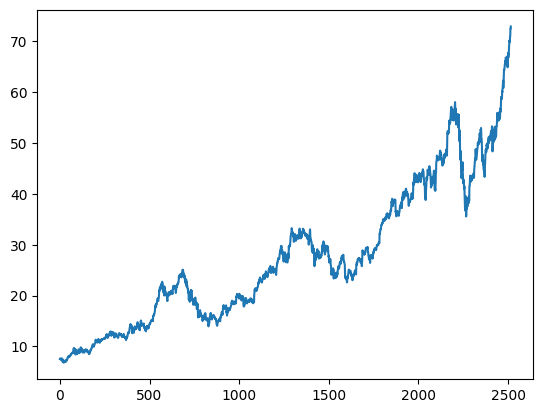

In [10]:
#working on close column
plt.plot(df.Close)

In [11]:
# Calculate the 100-day moving average of the closing prices
ma100 =df.Close.rolling(100).mean()

In [12]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.201075
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
Name: Close, Length: 2516, dtype: float64

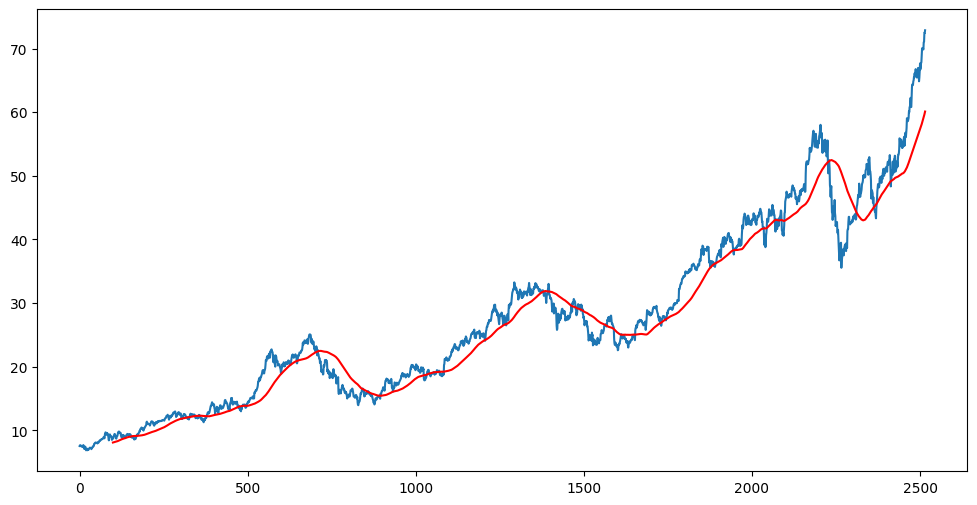

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
# Plotting the closing prices and the 100 day moving average

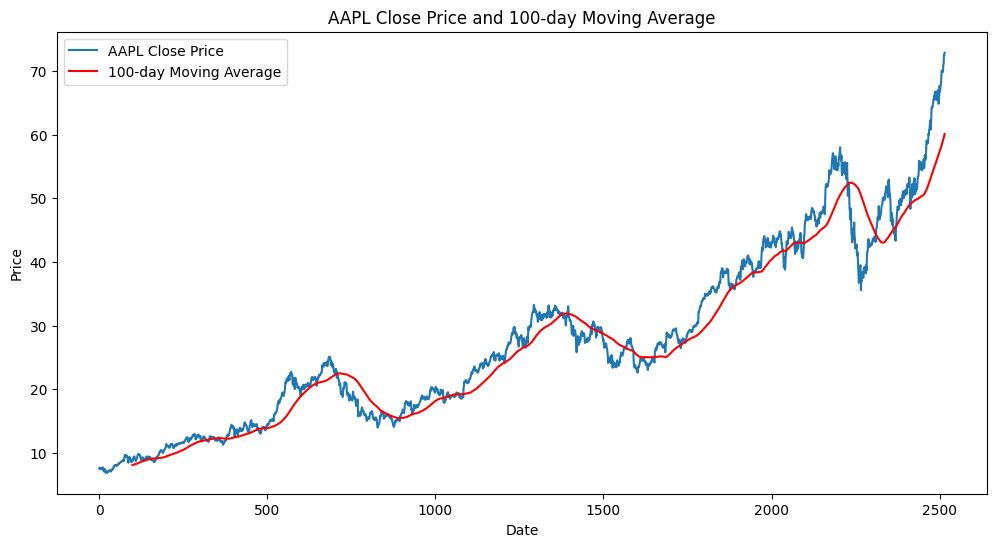

In [14]:

plt.figure(figsize=(12, 6))

# Plotting the closing prices of the stock
plt.plot(df.Close, label='AAPL Close Price')

# Plotting the 100-day moving average of the closing prices in red
plt.plot(ma100, 'r', label='100-day Moving Average')

# Adding title and labels for better readability
plt.title('AAPL Close Price and 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding a legend to distinguish between the two lines
plt.legend()

# Display the plot
plt.show()

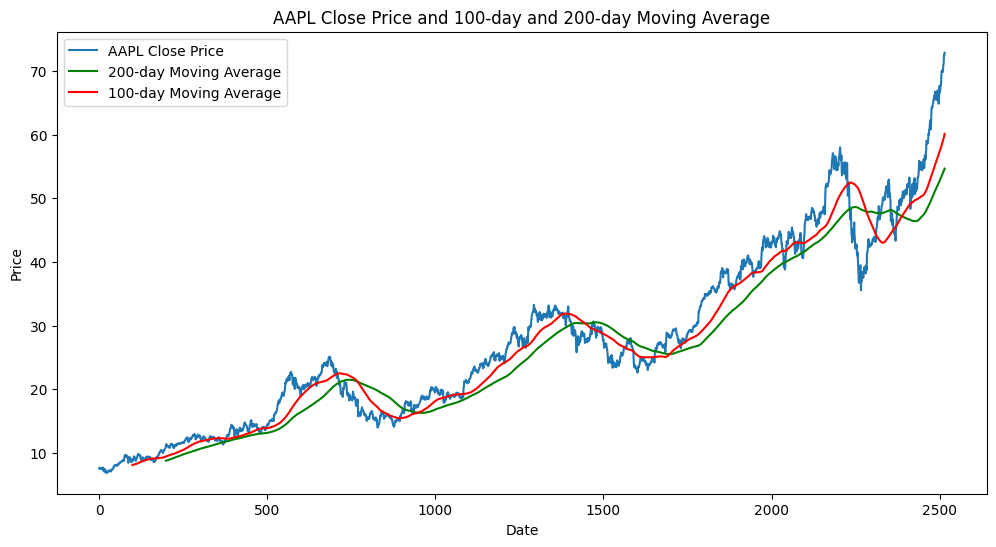

In [16]:

# Calculate the 200-day moving average of the closing prices
ma200 = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))

# Plotting the closing prices of the stock
plt.plot(df.Close, label='AAPL Close Price')

# Plotting the 200-day moving average of the closing prices in blue
plt.plot(ma200, 'g', label='200-day Moving Average')
plt.plot(ma100, 'r', label='100-day Moving Average')

# Adding title and labels for better readability
plt.title('AAPL Close Price and 100-day and 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding a legend to distinguish between the two lines
plt.legend()

# Display the plot
plt.show()

In [17]:
df.shape



(2516, 5)

In [18]:
#Splitting data into training and testing
data_training = pd.DataFrame (df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int (len(df)*0.70):int(len(df))])
print (data_training.shape)
print (data_testing.shape)
#70% training data
#30% testing data

(1761, 1)
(755, 1)


In [19]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [20]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [21]:
# Scale the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [22]:
data_training_array = scaler.fit_transform(data_training)

In [23]:
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [24]:
data_training_array.shape

(1761, 1)

In [26]:
# Create training data sequences
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
# ML Model

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
x_train.shape

(1661, 100, 1)

In [33]:
#Define the LSTM modle
model = Sequential()
model. add(LSTM(units =50, activation ='relu', return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))


model. add(LSTM(units =60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model. add(LSTM(units =80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))

model. add(LSTM(units =120, activation ='relu'))
model.add(Dropout(0.5))

model.add( Dense(units = 1))




In [34]:
# Display the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)              │ (None, 100, 50)     │      10,400 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_4 (Dropout)        │ (None, 100, 50)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_5 (LSTM)              │ (None, 100, 60)     │      26,640 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_5 (Dropout)        │ (None, 100, 60)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_6 (LSTM)              │ (None, 100, 80)     │      45,120 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_6 (Dropout)        │ (None, 100, 80)     │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ lstm_7 (LSTM)              │ (None, 120)         │      96,480 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dropout_7 (Dropout)        │ (None, 120)         │           0 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense (Dense)              │ (None, 1)           │         121 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# compile the model
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# Train the model
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 255ms/step - loss: 0.1534
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0151
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0119
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0095
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 0.0081
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0086
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 0.0084
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0082
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 0.0080
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0080
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0075
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0061
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0070
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 0.0059
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - 

In [36]:
# Save the model
model.save('keras_model.h5')

In [37]:
# Save the model using the native Keras format
model.save('my_model.keras')

In [38]:
data_testing.head()


,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [39]:
#Prepare the test data
past_100_days = data_training.tail(100)

In [41]:
print(type(past_100_days))
print(type(data_testing))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [88]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [90]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [91]:
input_data.shape

(855, 1)

In [94]:
x_test= []
y_test=[]
for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [95]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [98]:
# Making predictions using the trained model
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [99]:
y_predicted.shape

(755, 1)

In [100]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [101]:
y_predicted

array([[0.08917214],
       [0.09022807],
       [0.09131957],
       [0.0924248 ],
       [0.09352347],
       [0.09460172],
       [0.09565668],
       [0.09669585],
       [0.09772908],
       [0.09876823],
       [0.09981988],
       [0.10088516],
       [0.10196584],
       [0.1030619 ],
       [0.1041697 ],
       [0.10528462],
       [0.10640088],
       [0.10751136],
       [0.10861909],
       [0.10972964],
       [0.11084741],
       [0.1119725 ],
       [0.11309975],
       [0.11426344],
       [0.11550122],
       [0.11684601],
       [0.11832558],
       [0.11996067],
       [0.12176178],
       [0.12372801],
       [0.12584457],
       [0.12809306],
       [0.13046181],
       [0.13293551],
       [0.13549176],
       [0.13810275],
       [0.14072044],
       [0.14331545],
       [0.1458657 ],
       [0.14834888],
       [0.15075421],
       [0.153097  ],
       [0.15539366],
       [0.15764421],
       [0.15990393],
       [0.16218999],
       [0.1644961 ],
       [0.166

In [102]:
scaler.scale_ 

array([0.02123255])

In [103]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


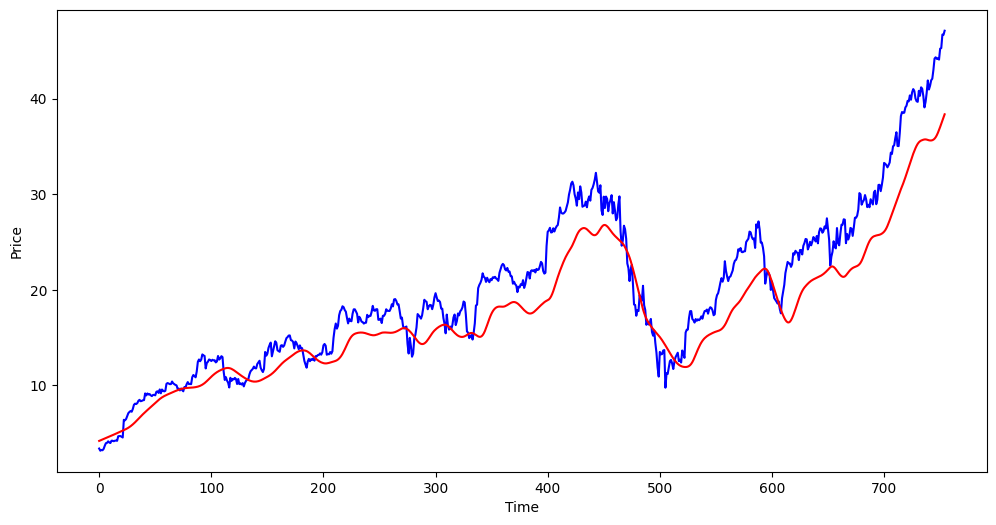

In [104]:
#Plot the actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()